In [1]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
df = pd.read_csv('supply_chain_data.csv')

# 🧹 Drop missing values
df.dropna(inplace=True)

# 🎯 Define target and features
target = 'Number of products sold'
X = df.drop(columns=[target])
y = df[target]

# 🔢 One-hot encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols)

# 📏 Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


C:\Users\91935\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 307251.7188 - val_loss: 288963.8438
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 294204.5312 - val_loss: 288635.8750
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 269746.6562 - val_loss: 288337.6250
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 284028.5312 - val_loss: 288060.8438
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 298063.0000 - val_loss: 287772.9688
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 291948.5000 - val_loss: 287461.2812
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 291002.0625 - val_loss: 287123.8750
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 286361.2812 - val_loss: 286747.5000
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 301372.8438 - val_loss: 286332.0000
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 312439.3438 - val_loss: 285869.0625
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 304361

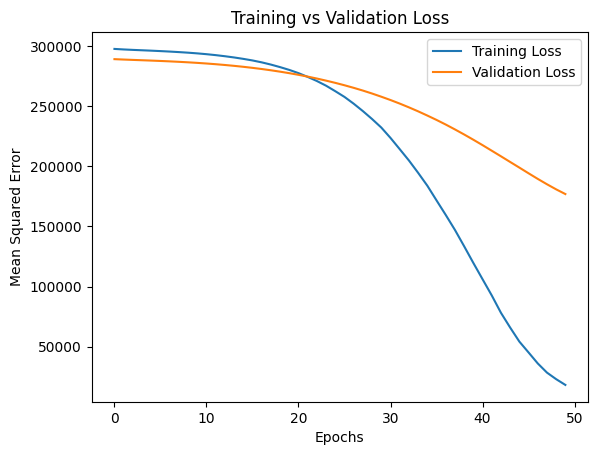

In [6]:
# 📦 Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 🧠 Build Neural Network Model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# 🧪 Compile the Model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# 🚀 Train the Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

# 📉 Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Mean Squared Error on Test Set: 227425.03


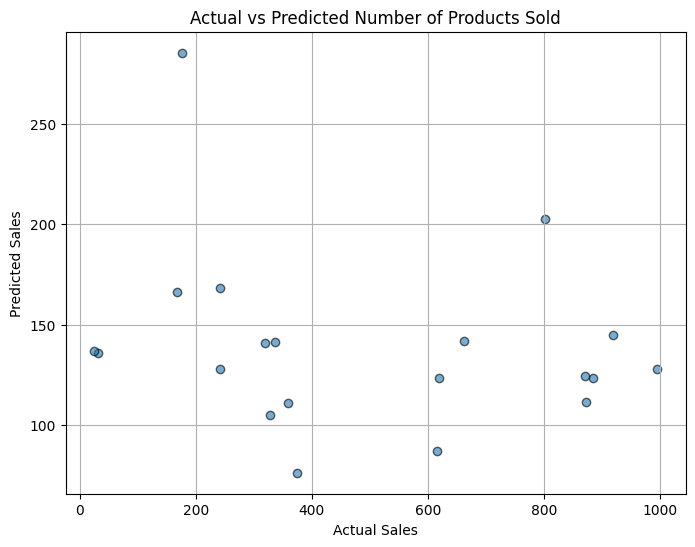

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Example Prediction - Predicted Sales: 142.05


In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 📊 Predict on the test set
y_pred = model.predict(X_test).flatten()

# 🧮 Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 📈 Plot: True vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Number of Products Sold")
plt.grid(True)
plt.show()

# 🔮 Example Prediction with New Data
# Let's assume new_data is a single row with same number of features
# Replace with actual new feature input if available
new_data = X_test[0].reshape(1, -1)
predicted_value = model.predict(new_data)[0][0]
print(f"Example Prediction - Predicted Sales: {predicted_value:.2f}")


In [8]:
from tensorflow.keras.models import load_model

# 💾 Save the trained model
model.save('demand_forecasting_model.h5')
print("Model saved as demand_forecasting_model.h5")

# 📥 Load the saved model
loaded_model = load_model('demand_forecasting_model.h5')
print("Model loaded successfully!")

# 🔮 Make a prediction using loaded model
# Use a sample input from test set or new preprocessed data
sample_input = X_test[0].reshape(1, -1)
predicted_sales = loaded_model.predict(sample_input)[0][0]
print(f"Predicted Sales (from loaded model): {predicted_sales:.2f}")


Model saved as demand_forecasting_model.h5
Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted Sales (from loaded model): 142.05


            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

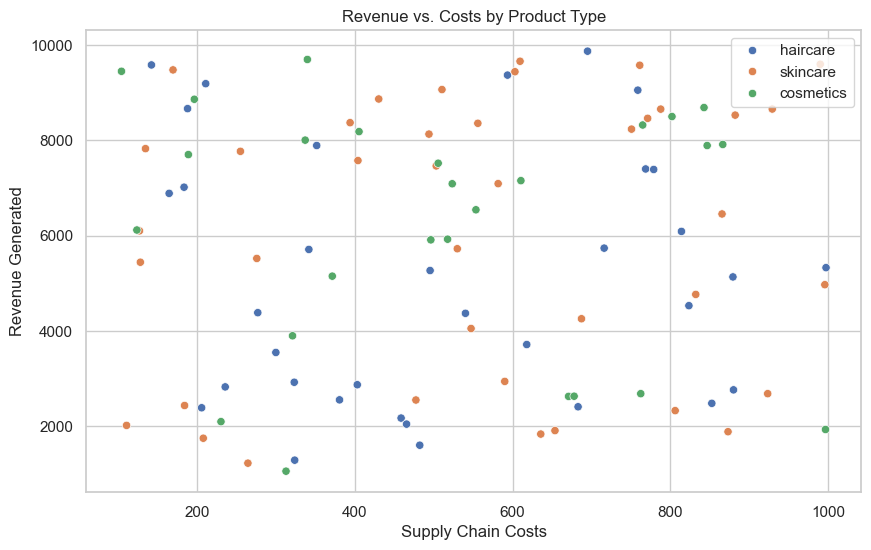

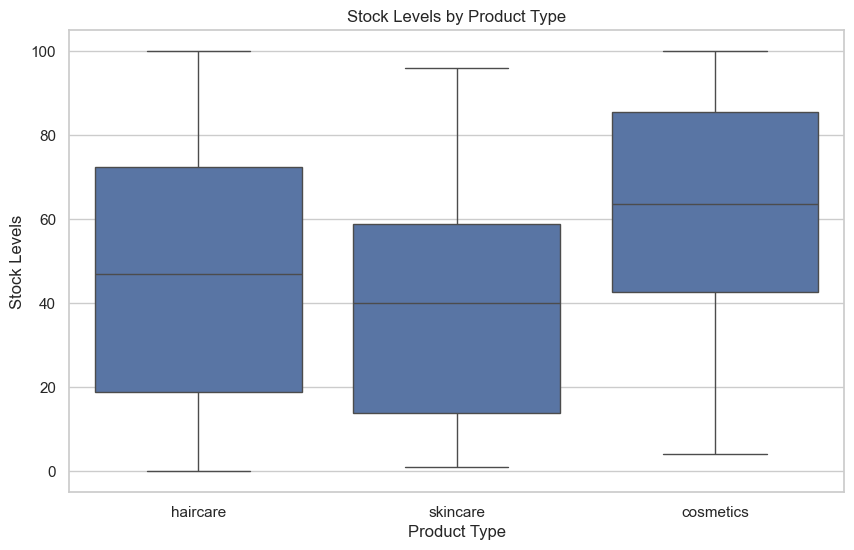

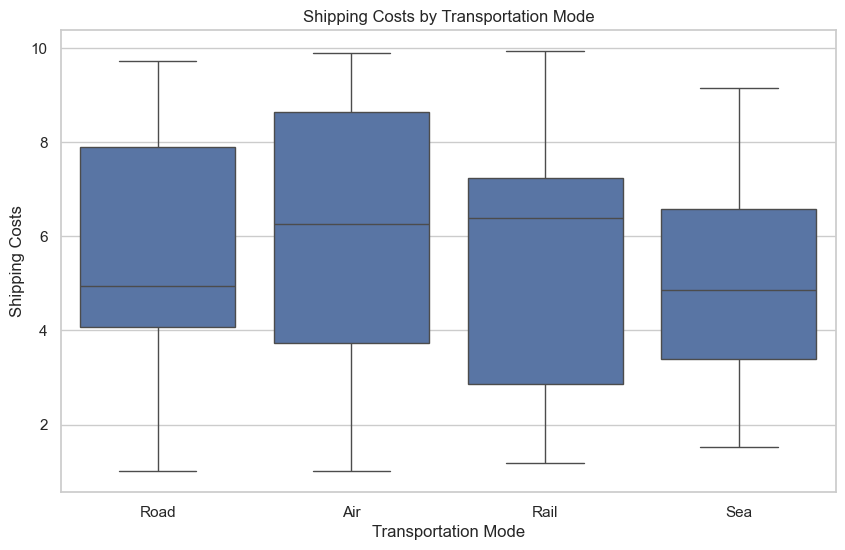

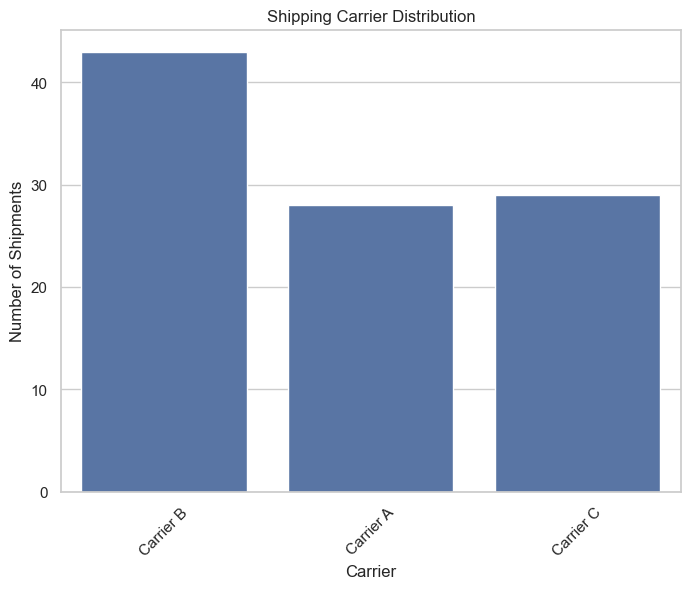

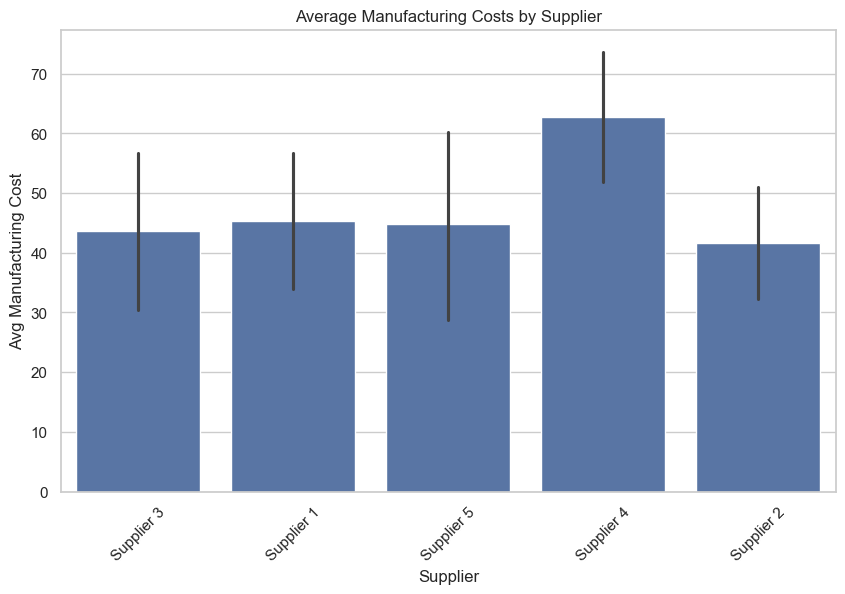

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('supply_chain_data.csv')

# 🧹 Drop missing values
df.dropna(inplace=True)

# 📊 Descriptive Statistics
print(df.describe())

# Set visual style
sns.set(style="whitegrid")

# 1️⃣ Revenue vs Costs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Costs', y='Revenue generated', data=df, hue='Product type')
plt.title('Revenue vs. Costs by Product Type')
plt.xlabel('Supply Chain Costs')
plt.ylabel('Revenue Generated')
plt.legend()
plt.show()

# 2️⃣ Stock Levels per Product Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Stock levels', data=df)
plt.title('Stock Levels by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Stock Levels')
plt.show()

# 3️⃣ Transportation Costs by Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transportation modes', y='Shipping costs', data=df)
plt.title('Shipping Costs by Transportation Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Shipping Costs')
plt.show()

# 4️⃣ Shipping Carrier Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Shipping carriers', data=df)
plt.title('Shipping Carrier Distribution')
plt.xlabel('Carrier')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Supplier-wise Manufacturing Costs
plt.figure(figsize=(10, 6))
sns.barplot(x='Supplier name', y='Manufacturing costs', data=df, estimator='mean')
plt.title('Average Manufacturing Costs by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Avg Manufacturing Cost')
plt.xticks(rotation=45)
plt.show()
